In [2]:
import numpy as np
import pandas as pd

In [83]:
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow.contrib.layers import flatten
from skimage.transform import rescale, resize, rotate
from skimage.io import imread
#from skimage.transform import resize

import logging

import seaborn as sns

from time import strftime, gmtime
from sklearn.utils import shuffle

import matplotlib.pyplot as plt


In [7]:
X = np.random.random(20)
y = np.random.random(20)
print(X)
print(y)

[ 0.03618063  0.21661419  0.57936123  0.88913751  0.69675827  0.93675773
  0.93976891  0.60147394  0.72540836  0.05785338  0.8777747   0.59353124
  0.22804069  0.46508306  0.27807279  0.92441673  0.75654764  0.18150081
  0.81432535  0.03575793]
[ 0.75116595  0.7149017   0.34920744  0.86375976  0.86793748  0.11594226
  0.23993262  0.86662157  0.90407481  0.20651432  0.214109    0.17220712
  0.74841336  0.69542068  0.40943838  0.37452164  0.72019242  0.78184758
  0.24971081  0.65514686]


In [8]:
X,y = shuffle(X,y)
print(X)
print(y)

[ 0.69675827  0.81432535  0.57936123  0.03618063  0.59353124  0.27807279
  0.72540836  0.05785338  0.46508306  0.21661419  0.92441673  0.93976891
  0.75654764  0.93675773  0.88913751  0.22804069  0.03575793  0.18150081
  0.60147394  0.8777747 ]
[ 0.86793748  0.24971081  0.34920744  0.75116595  0.17220712  0.40943838
  0.90407481  0.20651432  0.69542068  0.7149017   0.37452164  0.23993262
  0.72019242  0.11594226  0.86375976  0.74841336  0.65514686  0.78184758
  0.86662157  0.214109  ]


In [9]:
mask = X > 0.5
X_new = X[mask]
y_new = y[mask]
print(X_new)
print(y_new)

[ 0.69675827  0.81432535  0.57936123  0.59353124  0.72540836  0.92441673
  0.93976891  0.75654764  0.93675773  0.88913751  0.60147394  0.8777747 ]
[ 0.86793748  0.24971081  0.34920744  0.17220712  0.90407481  0.37452164
  0.23993262  0.72019242  0.11594226  0.86375976  0.86662157  0.214109  ]


In [12]:
mask == False

array([False, False, False,  True, False,  True, False,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False, False], dtype=bool)

In [27]:
number_index_less_than05 = np.arange(len(mask))[mask==False]
number_index_less_than05
new_index = np.random.choice(number_index_less_than05, int(len(number_index_less_than05)*0.5) )

In [28]:
X[new_index]

array([ 0.18150081,  0.27807279,  0.18150081,  0.18150081])

In [29]:
y[new_index]

array([ 0.78184758,  0.40943838,  0.78184758,  0.78184758])

In [10]:
np.random.choice( X[mask == False], int(len( X[mask==False] ) * 0.3))

array([ 0.05785338,  0.18150081])

In [11]:
np.random.choice( y[mask == False], int(len( X[mask==False] ) * 0.3))

array([ 0.65514686,  0.65514686])

In [4]:
def weight_variable(shape):
    initial_value = tf.truncated_normal(shape, stddev=0.1)
    W = tf.get_variable("W",initializer=initial_value)
    return W

def bias_variable(shape):
    initial_value = tf.truncated_normal(shape, 0.0, 0.001)
    b = tf.get_variable("b",initializer=initial_value)
    return b


In [5]:
name = "fc2"
with tf.variable_scope(name) as scope:
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])


In [6]:
with tf.Session() as sess:


    init_op = tf.group(tf.global_variables_initializer(),
                   tf.local_variables_initializer())
    sess.run(init_op)
    saver = tf.train.Saver()
    
    w = sess.run(W_fc2)

In [89]:
def getGray(image):

    YCrCb = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    return YCrCb

def getRGB(image):

    rgb= cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)
    return rgb

def showImage(img):
    plt.imshow(img)
    plt.show()
    
def resize_img(image):
        """
        Returns an image resized to match the input size of the network.
        :param image: Image represented as a numpy array.
        """
        img = resize(image, (66, 200), mode='reflect')
        return img #resize(image, (200, 66))

def cv2resize(image):
    
    return cv2.resize(image,(200,66), interpolation=cv2.INTER_AREA)

In [25]:
cwd = os.path.join( os.getcwd(), "track2_train/IMG" )
cwd_data = os.path.join( os.getcwd(), "data/IMG" )
cwd_data2 = os.path.join( os.getcwd(), "track2_train/IMG" )



In [26]:
filename = "center_2018_03_04_12_50_39_178.jpg"
filename_data = "center_2016_12_01_13_32_47_595.jpg"
filename_data2 = "center_2018_03_04_12_50_39_178.jpg"


In [27]:
image_path = os.path.join(cwd,filename)
image_path_data = os.path.join(cwd_data,filename_data)


In [28]:
img = imread(image_path)
imgYcrbr = getGray(img)

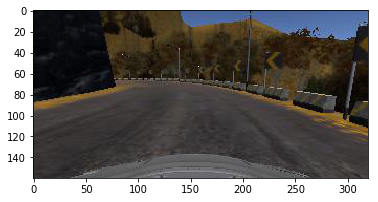

In [29]:
plt.imshow(img)

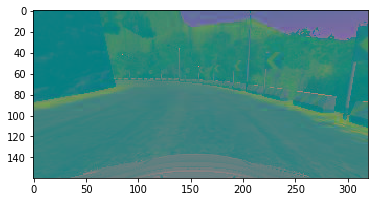

In [30]:
plt.imshow(imgYcrbr[:,:,:])

In [95]:
img = imread(image_path_data)
imgYcrbr = getGray(img)

imgYcrbr[:,:,2]=imgYcrbr[:,:,2] * (np.random.uniform() )
rgb = getRGB(imgYcrbr)

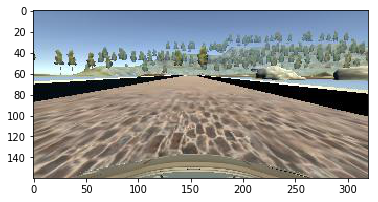

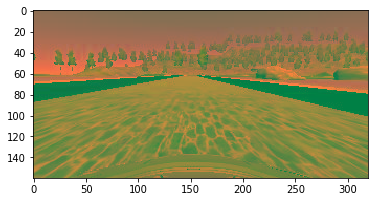

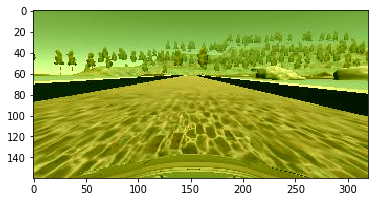

In [96]:
plt.imshow(img)
plt.show()
plt.imshow(imgYcrbr[:,:,:])
plt.show()
showImage(rgb)

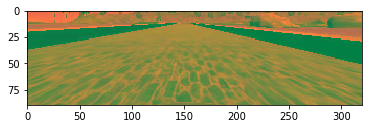

In [97]:
newimg = imgYcrbr[50:-20,:]
showImage(newimg)

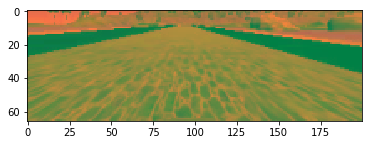

(66, 200, 3)


In [98]:
res_img = cv2resize(newimg)
showImage(res_img)
print(res_img.shape)

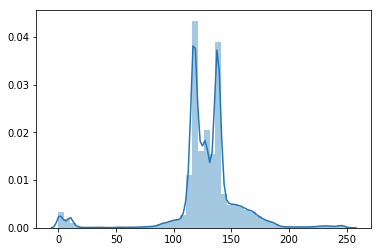

In [85]:
sns.distplot(res_img.ravel())